<a href="https://colab.research.google.com/github/abdulmateeng/Student_training_prog_AIML/blob/main/AIML_Module_1_Lab_2_Machine_learning_terms_and_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##AIML Module 1 - Lab 2
# Machine learning terms and metrics


 In this lab, we will show a part of the ML pipeline by extracting features, training and testing

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# set randomseed
rng = np.random.default_rng(seed=42)

In this lab, we will use the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district.

Let us download and examine the dataset.

In [95]:
 dataset =  datasets.fetch_california_housing()
 # print(dataset.DESCR)  # uncomment this if you want to know more about this dataset
 # print(dataset.keys())  # if you want to know what else is there in this dataset
 dataset.target = dataset.target.astype(np.int) # so that we can classify
 print(dataset.data.shape)
 print(dataset.target.shape)

(20640, 8)
(20640,)


<ipython-input-95-60ae2e9a125e>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dataset.target = dataset.target.astype(np.int) # so that we can classify


Here is a function for calculating the 1-nearest neighbours

In [96]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

We will also define a 'random classifier', which randomly allots labels to each sample

In [97]:
def RandomClassifier(traindata, trainlabel, testdata):
  # in reality, we don't need these arguments

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm.

In [98]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

Let us make a function to split the dataset with the desired probability.

In [99]:
def split(data, label, percent):
  # generate a random number for each sample
  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [100]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel)*100/len(dataset.target),'%')

Number of test samples =  4168
Number of other samples =  16472
Percent of test data =  20.1937984496124 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [101]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 95/100)

What is the accuracy of our classifiers on the train dataset?

In [102]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.17208975260499904


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case.

Let us predict the labels for our validation set and get the accuracy

In [103]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using nearest neighbour is  0.36550060313630883
Validation accuracy using random classifier is  0.13268998793727382


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier.

Now let us try another random split and check the validation accuracy

In [104]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 95/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.3656998738965952


You can run the above cell multiple times to try with different random splits.
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [105]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.3430902111324376


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

Validation accuracy of nearest neighbour is  0.27719859290054366
Validation accuracy of nearest neighbour is  0.2921008403361344
Validation accuracy of nearest neighbour is  0.3043323103275997
Validation accuracy of nearest neighbour is  0.3101661332114007
Validation accuracy of nearest neighbour is  0.32008487717293727
Validation accuracy of nearest neighbour is  0.31952611553095817
Validation accuracy of nearest neighbour is  0.3224105461393597
Validation accuracy of nearest neighbour is  0.32361166600079905
Validation accuracy of nearest neighbour is  0.3310182592136216
Validation accuracy of nearest neighbour is  0.33795451781588226
Validation accuracy of nearest neighbour is  0.3411796536796537
Validation accuracy of nearest neighbour is  0.34454668879167294
Validation accuracy of nearest neighbour is  0.34655021834061134
Validation accuracy of nearest neighbour is  0.3412256267409471
Validation accuracy of nearest neighbour is  0.34154671871188097
Validation accuracy of nearest n

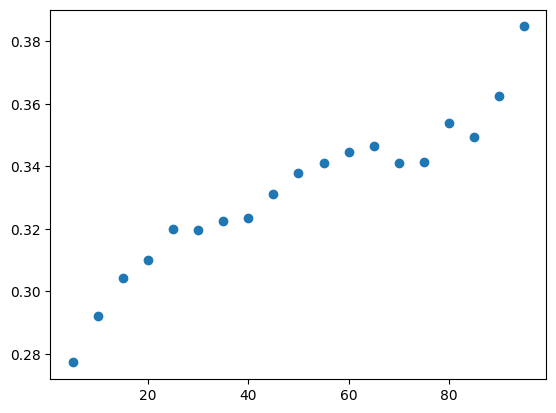

In [113]:
# NN Visualisation for different % of Validation Dataset
nntemp_inc = []
temp_inc = []
for i in range (5,100,5):
  traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, i/100)
  valpred = NN(traindata, trainlabel, valdata)
  valAccuracy = Accuracy(vallabel, valpred)
  nntemp_inc.append(valAccuracy)
  print("Validation accuracy of nearest neighbour is ", valAccuracy)
for i in range (5, 100, 5):
  temp_inc.append(i)
plt.scatter(temp_inc, nntemp_inc)
plt.show()

**Answers:**

There is no change major in accuracy if we increase the validation set,  but if we decrease validation set then after some extent the accuracy decreases.
Above Scatter plot shows the Accuracy of NN with increase of Training set or Decrease of Val Set.

Validation accuracy of nearest neighbour is  0.16360611683409046
Validation accuracy of nearest neighbour is  0.1658291457286432
Validation accuracy of nearest neighbour is  0.16953839608593915
Validation accuracy of nearest neighbour is  0.16623455848711302
Validation accuracy of nearest neighbour is  0.16822126693162462
Validation accuracy of nearest neighbour is  0.16659420919920007
Validation accuracy of nearest neighbour is  0.16752408567954355
Validation accuracy of nearest neighbour is  0.16065309413424714
Validation accuracy of nearest neighbour is  0.16075133777438025
Validation accuracy of nearest neighbour is  0.16920245398773007
Validation accuracy of nearest neighbour is  0.16749563113321683
Validation accuracy of nearest neighbour is  0.17235134319348022
Validation accuracy of nearest neighbour is  0.16239915819010872
Validation accuracy of nearest neighbour is  0.16081632653061226
Validation accuracy of nearest neighbour is  0.16254589963280294
Validation accuracy of nea

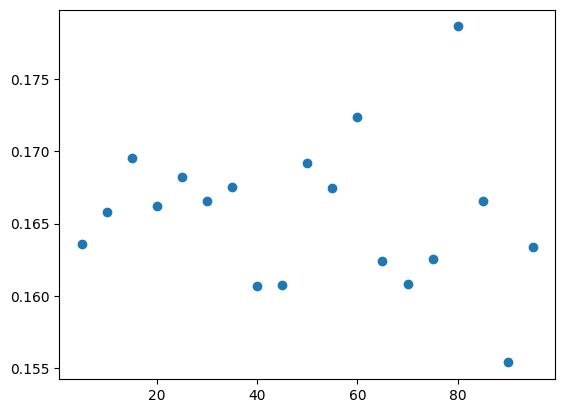

In [114]:
# Random Classfier Visualisation for different % of Validation Dataset
nntemp_inc = []
temp_inc = []
for i in range (5,100,5):
  traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, i/100)
  valpred = RandomClassifier(traindata, trainlabel, valdata)
  valAccuracy = Accuracy(vallabel, valpred)
  nntemp_inc.append(valAccuracy)
  print("Validation accuracy of nearest neighbour is ", valAccuracy)
for i in range (5, 100, 5):
  temp_inc.append(i)
plt.scatter(temp_inc, nntemp_inc)
plt.show()

In case of Random Classifer, when the % of Training Dataset increases there is no trend in Accuracy, as the % of Validation set changes it almost remains same, But, we need to remember that Accuracy of NN is twice of Random Classifier.

We can see that on increasing the size of Validation set accuracy decreases, In the same way accuracy decreases as we decrease the % of traindata.

I think the good percentage, of validation set would be 15-20%;
more ideal is
Training - 60%
Validation - 20%
Testing - 20%

## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>crossvalidation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute.

In [116]:
# you can use this function for random classifier also
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

In [120]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.3461086379394977
test accuracy is  0.3430902111324376


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


**Answers**
1. Yes, averaging the Validation accuracy will definetly give better results.


In [118]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 20, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.3479996418993493
test accuracy is  0.3430902111324376


2. The test accuracy will not change, It will help to increase the accuracy of validation set.

3. Yes, there will be effect on validation accuracy as we change the number of iterations, there is no trend or any continous plot. It may slightly increase or decrease.

In [122]:
x_val = []
y_val = []
for i in range (10,100,10):
  print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, i, classifier=NN))
  testpred = NN(alltraindata, alltrainlabel, testdata)
  #print('test accuracy is ',Accuracy(testlabel, testpred) )
  x_val.append(i)
  y_val.append(Accuracy(testlabel, testpred))
plt.plot(x_val, y_val)
plt.show();

Average validation accuracy is  0.34331720126906196
Average validation accuracy is  0.34670130922482456
Average validation accuracy is  0.3459000750335829


KeyboardInterrupt: ignored

4. On increasing iterations we cannot improve significantly, the probability of false prediction may only decrease for small sets.